# <p style="text-align: center;"> Heart Failure Prediction - Exploratory Data Analysis</p>

## 1.0 Imports

In [1]:
# Import the needed Library 

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go 
from plotly.subplots import make_subplots
import plotly.io as pio
import plotly.graph_objs as gobj

from IPython.display import Image
from scipy import stats

from library.sb_utils import save_file

### 1.1 Load The Heart Failure Prediction Dataset 

In [2]:
# The supplied CSV data file is the raw_data directory
# Create a Dataframe 

heart_df = pd.read_csv('../HeartFailurePrediction/data/heart.csv')

In [3]:
# Checking the columns and the first 5 rows 
heart_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## Attribute Information

Age: age of the patient [years]

Sex: sex of the patient [M: Male, F: Female]

ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

RestingBP: resting blood pressure [mm Hg]

Cholesterol: serum cholesterol [mm/dl]

FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]

ExerciseAngina: exercise-induced angina [Y: Yes, N: No]

Oldpeak: oldpeak = ST [Numeric value measured in depression]

ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

HeartDisease: output class [1: heart disease, 0: Normal]


In [4]:
# Describe the data and transpose 
heart_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [5]:
# Checking the types of variables 
heart_df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [6]:
# Checking the Data types 
heart_df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

# 2.0 Exploring The Data

In [7]:
# Checking to see if there is any duplicaed data 

heart_df[heart_df.duplicated(keep=False)]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


#### We can see that there is duplicate data. 

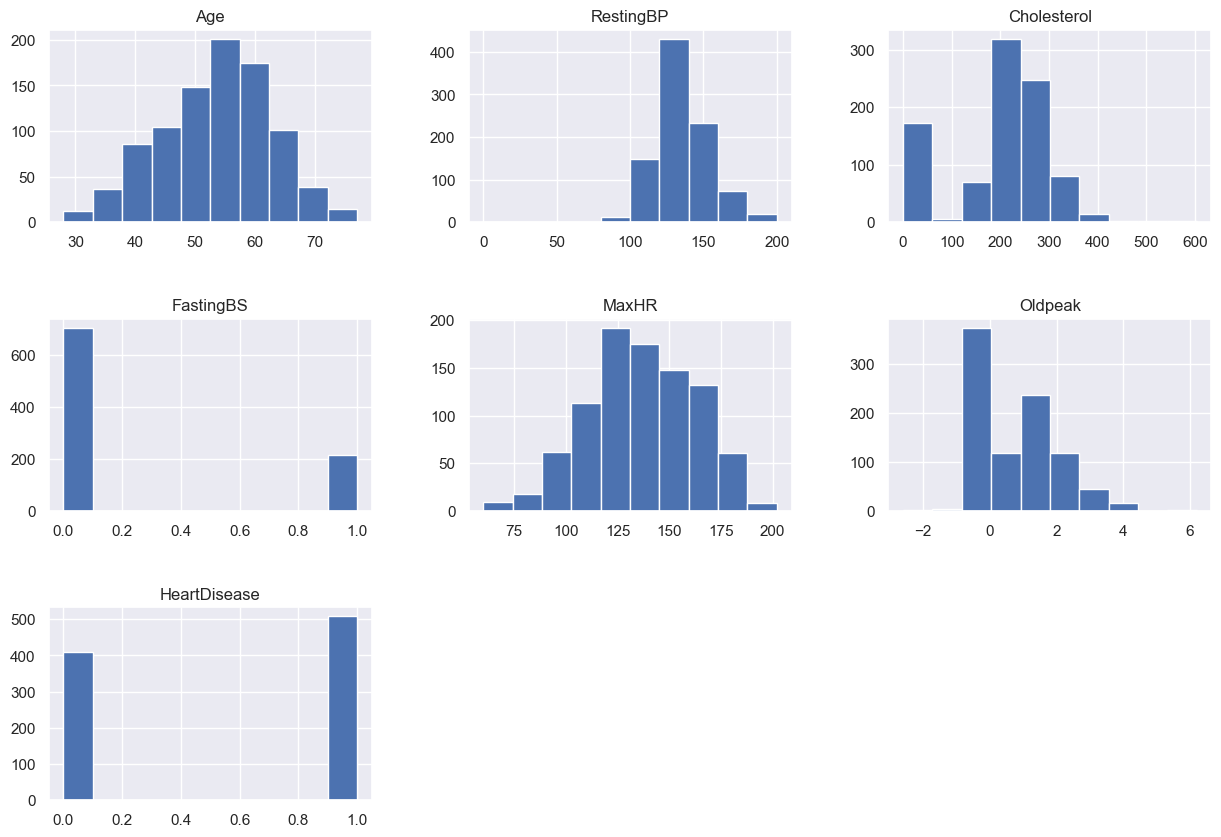

In [8]:
# Calling heart_df's 'hist' method to plot histograms of each of the numeric features
# Passing it an argument figsize=(15,10)
# Calling plt.subplots_adjust with an argument hspace=0.5 to adjust the spacing to create legible and easy-to-read

sns.set()
heart_df.hist(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5);

## 2.1 Get an overview distribution of each column

Text(0.5, 1.0, 'Oldpeak vs HeartDisease')

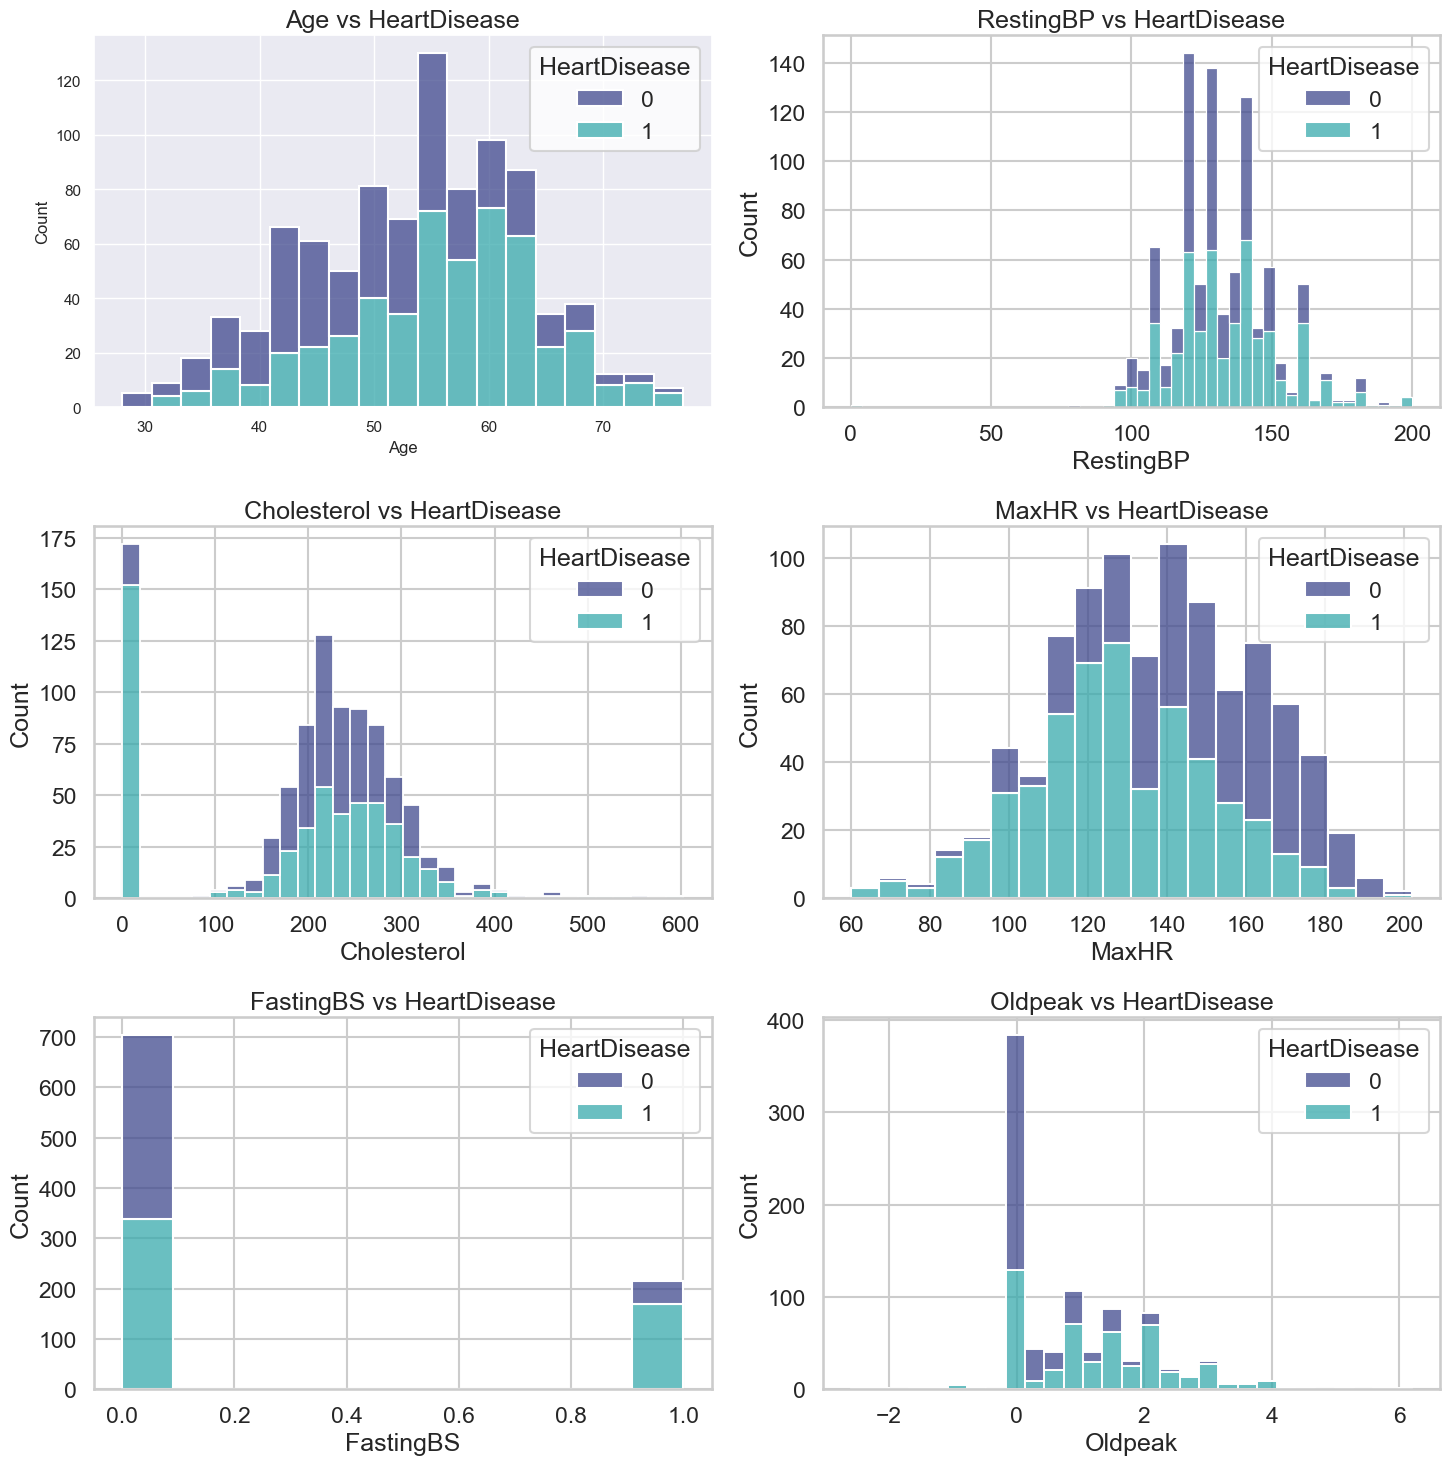

In [9]:
plt.figure(figsize=(15,15))
plt.subplot(3,2,1)
sns.set_style('whitegrid')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=heart_df, x='Age', hue="HeartDisease", multiple="stack", palette='mako')
plt.title('Age vs HeartDisease')

plt.subplot(3,2,2)
sns.set_style('whitegrid')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=heart_df, x='RestingBP', hue="HeartDisease", multiple="stack", palette='mako')
plt.title('RestingBP vs HeartDisease')

plt.subplot(3,2,3)
sns.set_style('whitegrid')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=heart_df, x='Cholesterol', hue="HeartDisease", multiple="stack", palette='mako')
plt.title('Cholesterol vs HeartDisease')

plt.subplot(3,2,4)
sns.set_style('whitegrid')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=heart_df, x='MaxHR', hue="HeartDisease", multiple="stack", palette='mako')
plt.title('MaxHR vs HeartDisease')

plt.subplot(3,2,5)
sns.set_style('whitegrid')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=heart_df, x='FastingBS', hue="HeartDisease", multiple="stack", palette='mako')
plt.title('FastingBS vs HeartDisease')

plt.subplot(3,2,6)
sns.set_style('whitegrid')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=heart_df, x='Oldpeak', hue="HeartDisease", multiple="stack", palette='mako')
plt.title('Oldpeak vs HeartDisease')

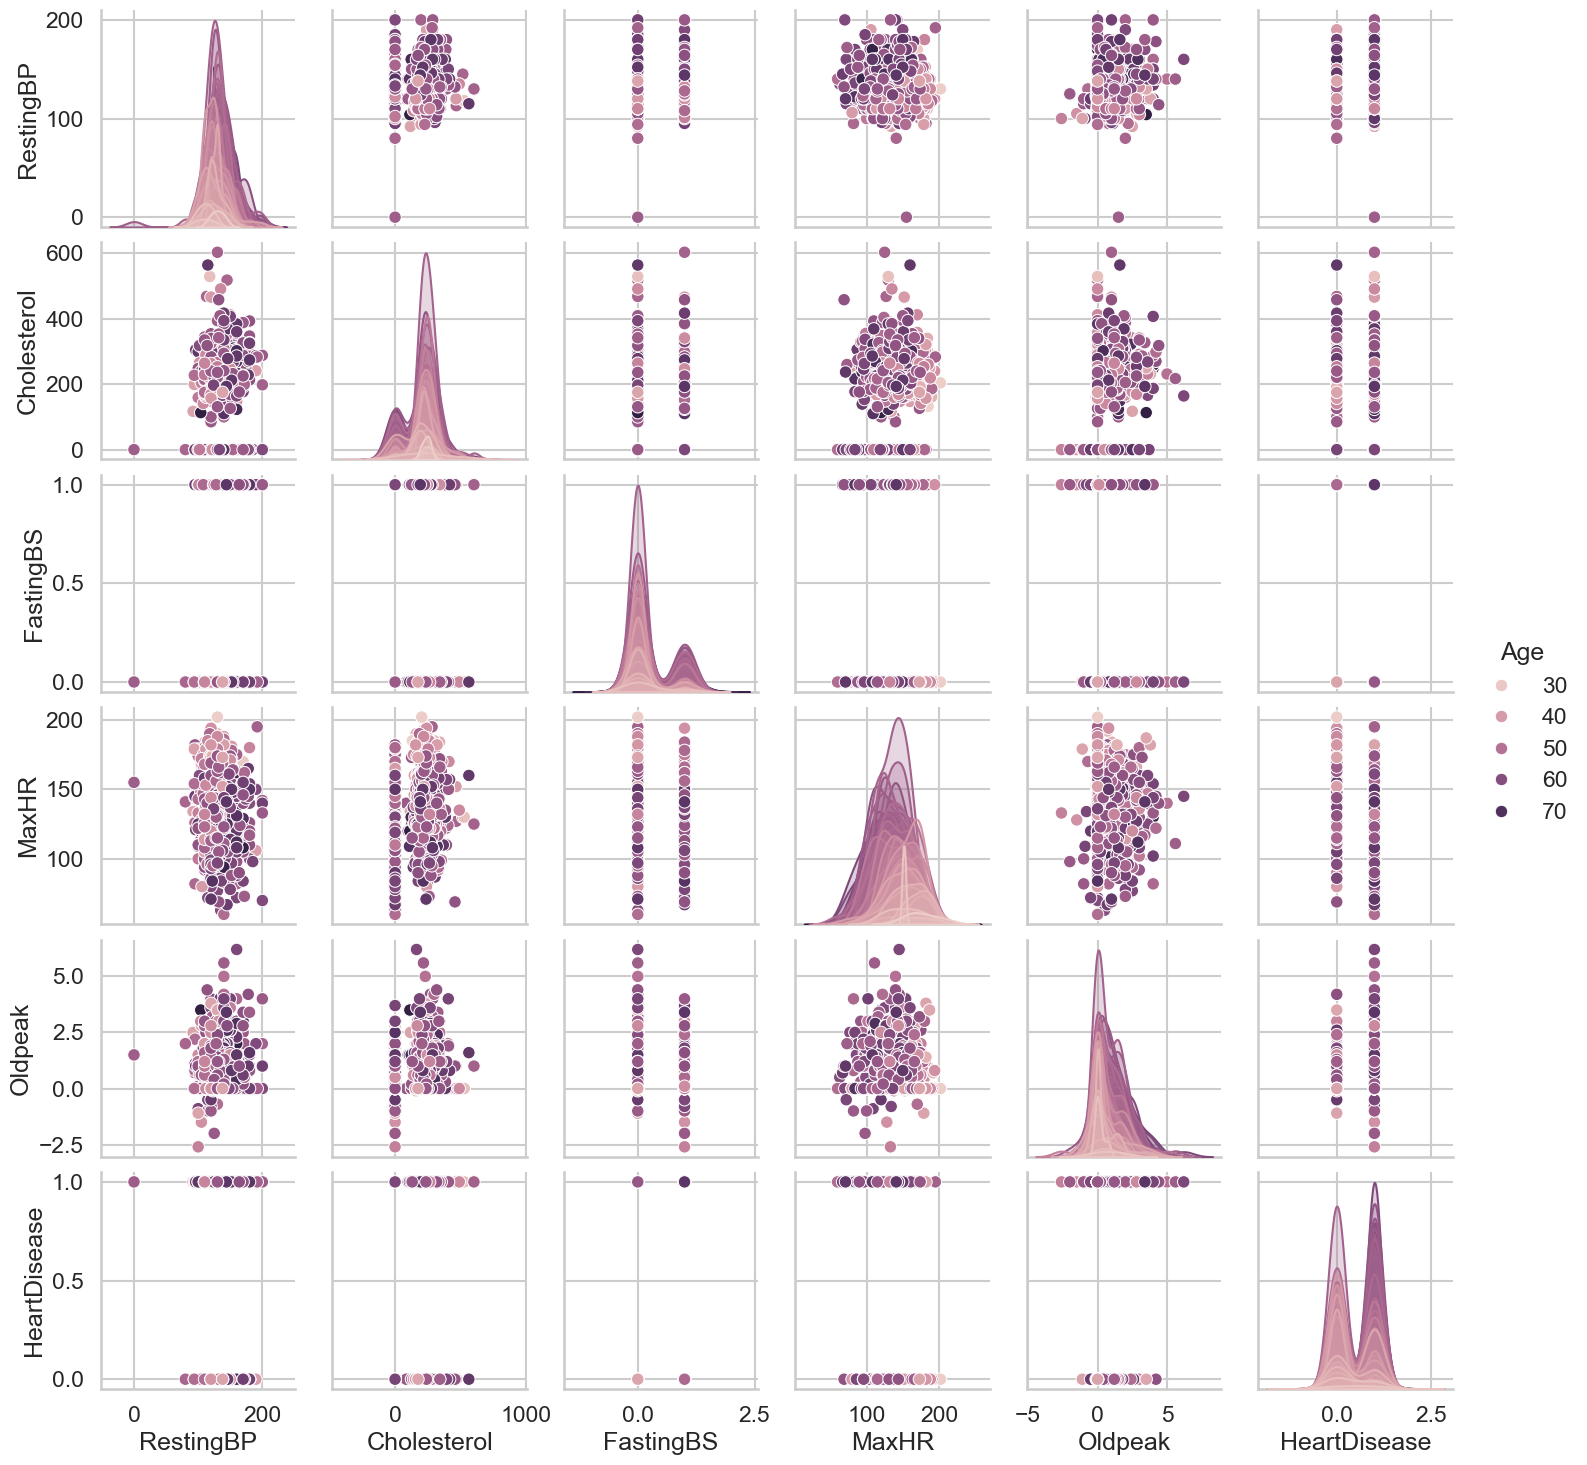

In [10]:
sns.pairplot(heart_df, hue='Age')

<Axes: title={'center': 'Searching for missing values:'}>

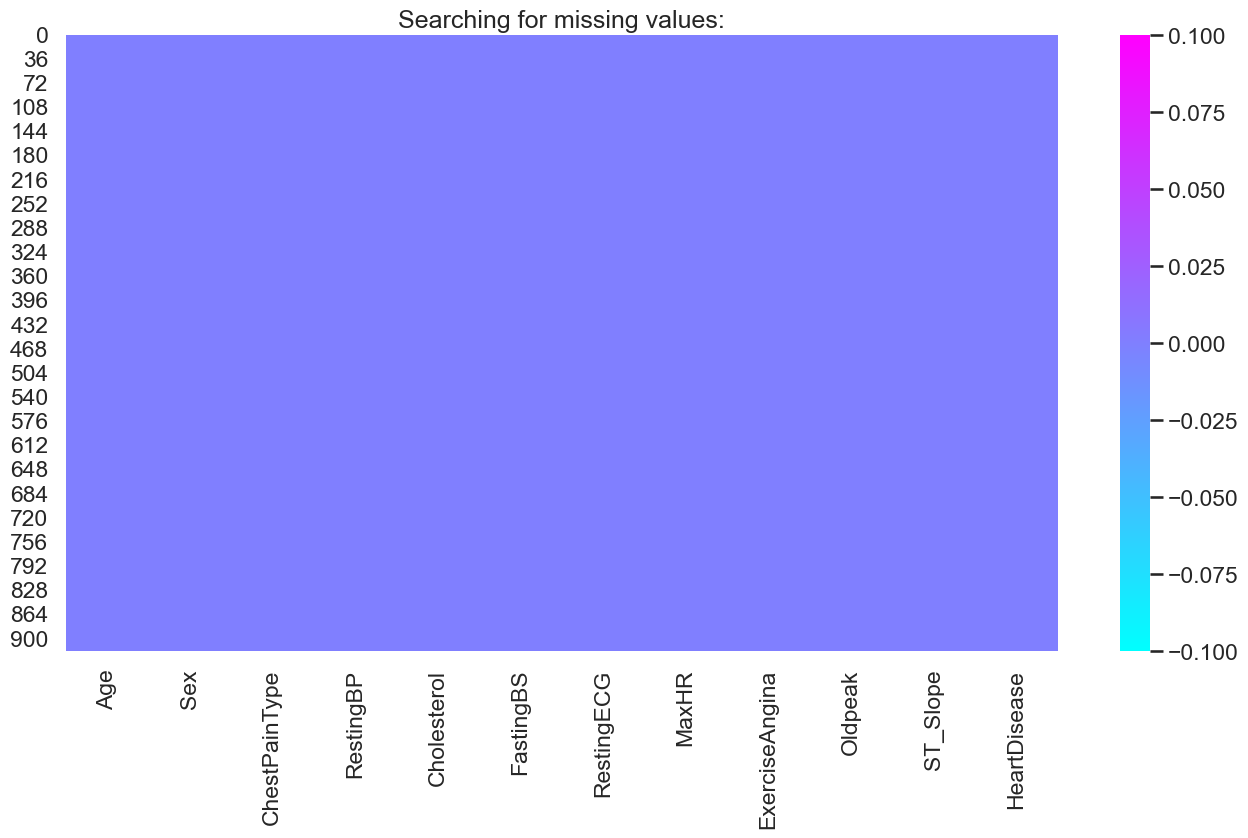

In [11]:
# Searching if there is a missing or null value
plt.figure(figsize=(16,8))
plt.title('Searching for missing values:')
sns.heatmap(data= heart_df.isnull(), cmap = 'cool', cbar = True)

In [12]:
#Visualizing the continous variables
fig = px.histogram(heart_df, x='Age', marginal='box')
fig.update_traces(marker_line_width=1, marker_line_color="black")
fig.show()

In [13]:
temp_df = heart_df.groupby(by="ChestPainType", as_index=False).agg(
    counts=pd.NamedAgg(column="ChestPainType", aggfunc="count")).sort_values(by="counts", ascending=False)

fig = px.bar(temp_df,
            x='ChestPainType',
            y='counts',
            color='counts',
            color_discrete_sequence = px.colors.qualitative.D3)
fig.update_traces(marker_line_width=1, marker_line_color="black")
fig.show()

Most of ChestPainType is ASY.

- TA = Typical Angina
- ATA = Atypical Angina
- NAP = Non-Anginal Pain
- ASY = Asymptomatic

#### RestingBP

#### The RestingBP(resting blood pressure) is continous variable.

In [14]:
heart_df.RestingBP.describe().round()

count    918.0
mean     132.0
std       19.0
min        0.0
25%      120.0
50%      130.0
75%      140.0
max      200.0
Name: RestingBP, dtype: float64

In [15]:
heart_df.RestingBP.mode()[0]

120

In [16]:
print(stats.skew(heart_df.RestingBP))

0.17954532149156327


In [17]:
fig = px.histogram(heart_df, x='RestingBP', marginal='box')
fig.update_traces(marker_line_width=1, marker_line_color="black")
fig.show()

In [18]:
heart_df[heart_df['RestingBP'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


The plot shows that:
- most patient have resting blood pressure between 120 and 140
- The distribution is moderately skewd to the right with a positive skew value 0.18
- There is 1 record with RestingBP = 0, which is not normal.

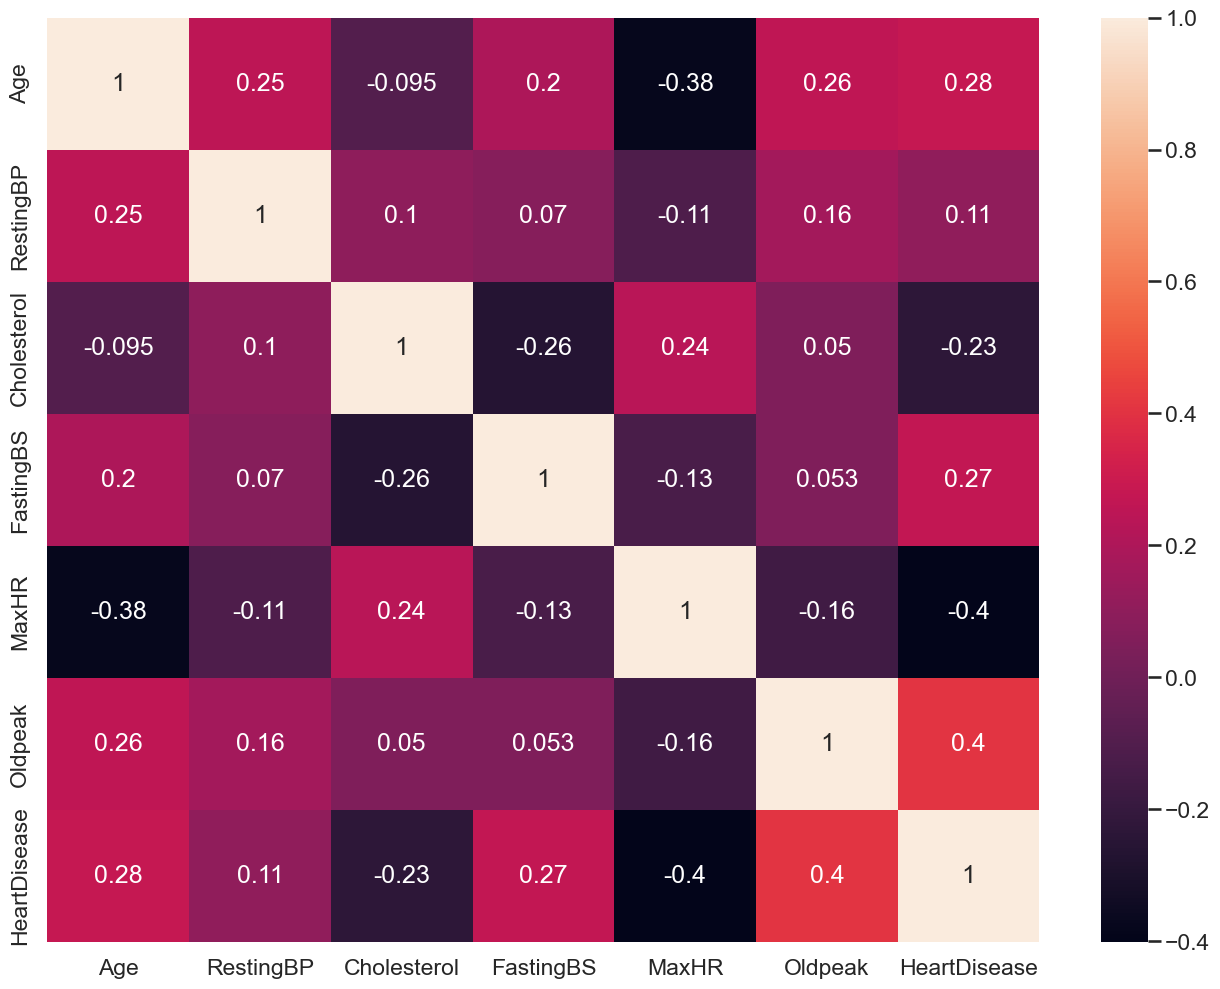

In [19]:
# Checking the Correlation of our variables

plt.subplots(figsize=(16, 12))
sns.heatmap(heart_df.select_dtypes(include=[np.number]).corr(), annot = True);


### Interpretation of Correlation Matrix
 
#### Pearson Correlation Coefficient
 - Each square shows the correlation between the variables on each axis. Correlation ranges from -1 to +1. Values closer to zero means there is no linear trend between the two variables.
 - The close to 1 the correlation is the more positively correlated they are; that is as one increases so does the other and the closer to 1 the stronger this relationship is.
 - A correlation closer to -1 is similar, but instead of both increasing one variable will decrease as the other increases.
 - The diagonals are all 1/dark green because those squares are correlating each variable to itself (so it's a perfect correlation). For the rest the larger the number and darker the color the higher the correlation between the two variables.
 - The plot is also symmetrical about the diagonal since the same two variables are being paired together in those squares.


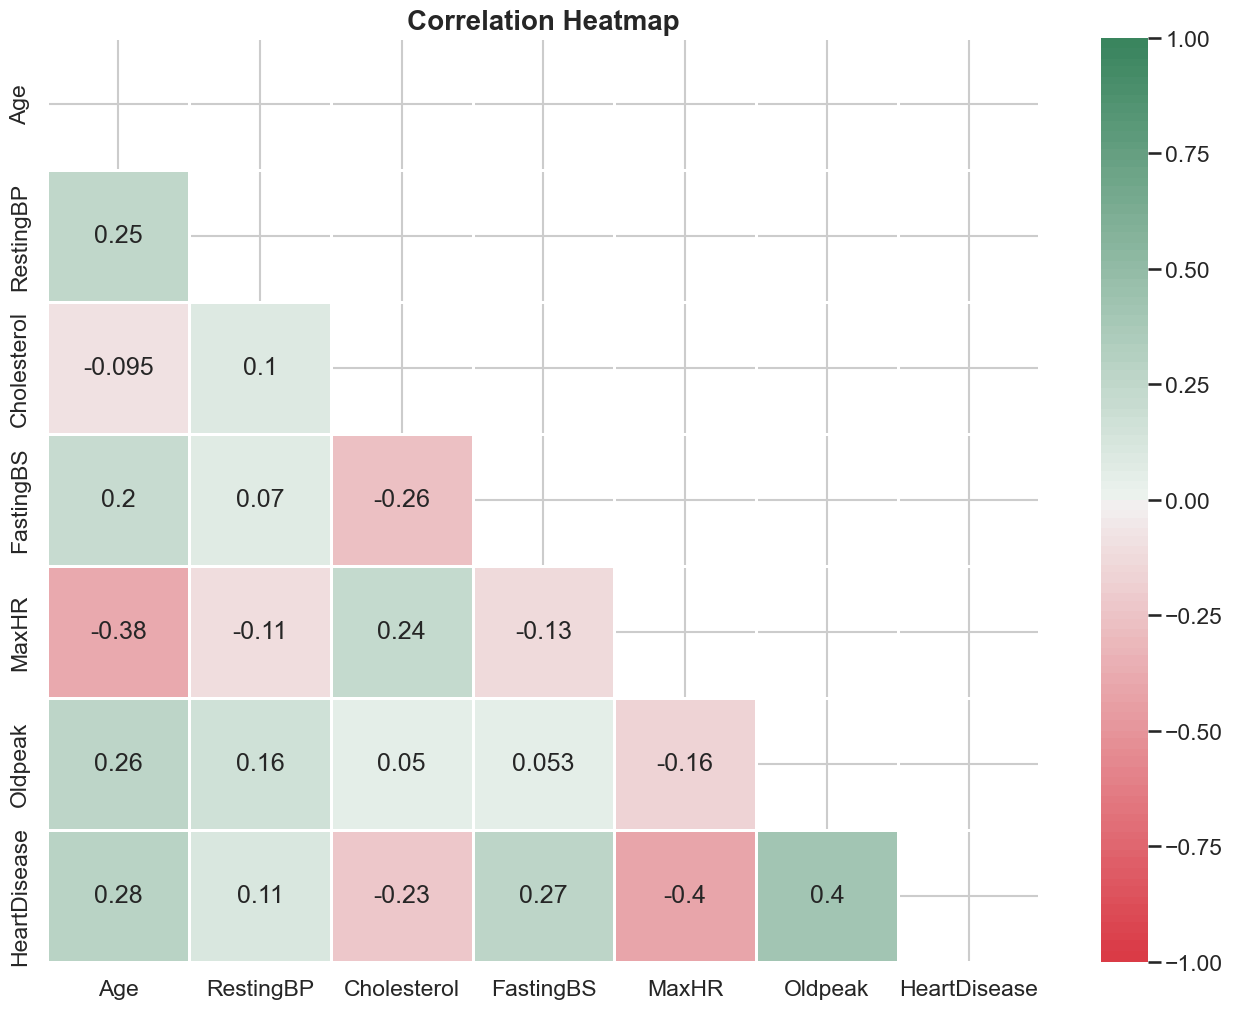

In [20]:
dcorr = heart_df.select_dtypes(include=[np.number]).corr()


mask = np.zeros_like(dcorr)

mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(16, 12)) 
sns.heatmap(dcorr, cmap=sns.diverging_palette(10, 145, n=100), 
            vmin=-1, vmax=1, center=0, linewidths=1, annot=True, mask=mask, ax=ax).set_title("Correlation Heatmap", fontsize=20,fontweight="bold");

Scatter plot

Show the scatter for each two variables at a time:

In [21]:
corr_value = heart_df["Age"].corr(heart_df["RestingBP"])

fig = px.scatter(
    data_frame = heart_df,
    x="Age",
    y="RestingBP",
    marginal_x="histogram",
    marginal_y="histogram",
    trendline="ols",
    trendline_color_override="red",
    title=f"Correlation between Age and RestingBP is: {corr_value:.2f}",
)

fig.show()

In [22]:
corr_value = heart_df["Age"].corr(heart_df["Cholesterol"])

fig = px.scatter(
    data_frame=heart_df,
    x="Age",
    y="Cholesterol",
    marginal_x="histogram",
    marginal_y="histogram",
    trendline="ols",
    trendline_color_override="red",
    title=f"Correlation between Age and Cholester0l is: {corr_value:.2f}",
)

fig.show()

In [23]:
corr_value = heart_df["Age"].corr(heart_df["Oldpeak"])

fig = px.scatter(
    data_frame = heart_df,
    x="Age",
    y="Oldpeak",
    marginal_x="histogram",
    marginal_y="histogram",
    trendline="ols",
    trendline_color_override="red",
    title=f"Correlation between Age and Oldpeak is: {corr_value:.2f}",
)

fig.show()

In [24]:
corr_value = heart_df["Age"].corr(heart_df["MaxHR"])

fig = px.scatter(
    data_frame = heart_df,
    x="Age",
    y="MaxHR",
    marginal_x="histogram",
    marginal_y="histogram",
    trendline="ols",
    trendline_color_override="red",
    title=f"Correlation between Age and MaxHR is: {corr_value:.2f}",
)

fig.show()

### Bivariate distributions

Another way to study the relation between two variables is with 2D Histograms (distribution).


Just like the distributions we used in the Univariate Analysis section, we can show the distribution for two variables x and y, which would give us better insights on how much the values from the two variables overlap, and show cluster regions in the 2D space.


Compared to scatter plots, 2D histograms are better at handling large amounts of data, as they use rectangular bins, and count the number of points withing each bin.

In [25]:
fig = px.density_heatmap(data_frame=heart_df, x="Age", y="RestingBP", color_continuous_scale="PuBu")
fig.show()

#### We can see from this chart some clusters.

#### For example, there are two clusters of Patient who age between 50 and 54 years old and the other clusters of Patient who age between 55 and 59 years old. These two clusters account for about 100 patients. (which is about 10% of the total dataset)

In [26]:
fig = px.density_heatmap(data_frame = heart_df, x = "Age", y = "Cholesterol", color_continuous_scale = "PuBu")
fig.show()

#### This chart shows that patients who age above 50 has a higher Cholesterol level than patients who age below 50.

In [27]:
fig = px.density_heatmap(data_frame = heart_df, x="Age", y="MaxHR", color_continuous_scale="PuBu")
fig.show()

#### This chart shows that MaxHR ia lower when the patient is older. This is a positive linear relation.

In [28]:
fig = px.density_heatmap(data_frame = heart_df, x="Age", y="Oldpeak", color_continuous_scale="PuBu")
fig.show()

#### This chart shows that almost of the patients has 0.1 - 0.2 oldpeak.

### Multivariate analysis

So far, all the plots we used before were used either to explore one variable, or to show the relation between a pair of variables.

However, we are often interested in answering the question: How does the relation between two variables changes as a function of a third variable?

In this section, we'll focus on answering these kinds of questions, where we'll use similar plots to the ones we used before, with conditioning on other variable.

### Pairplot

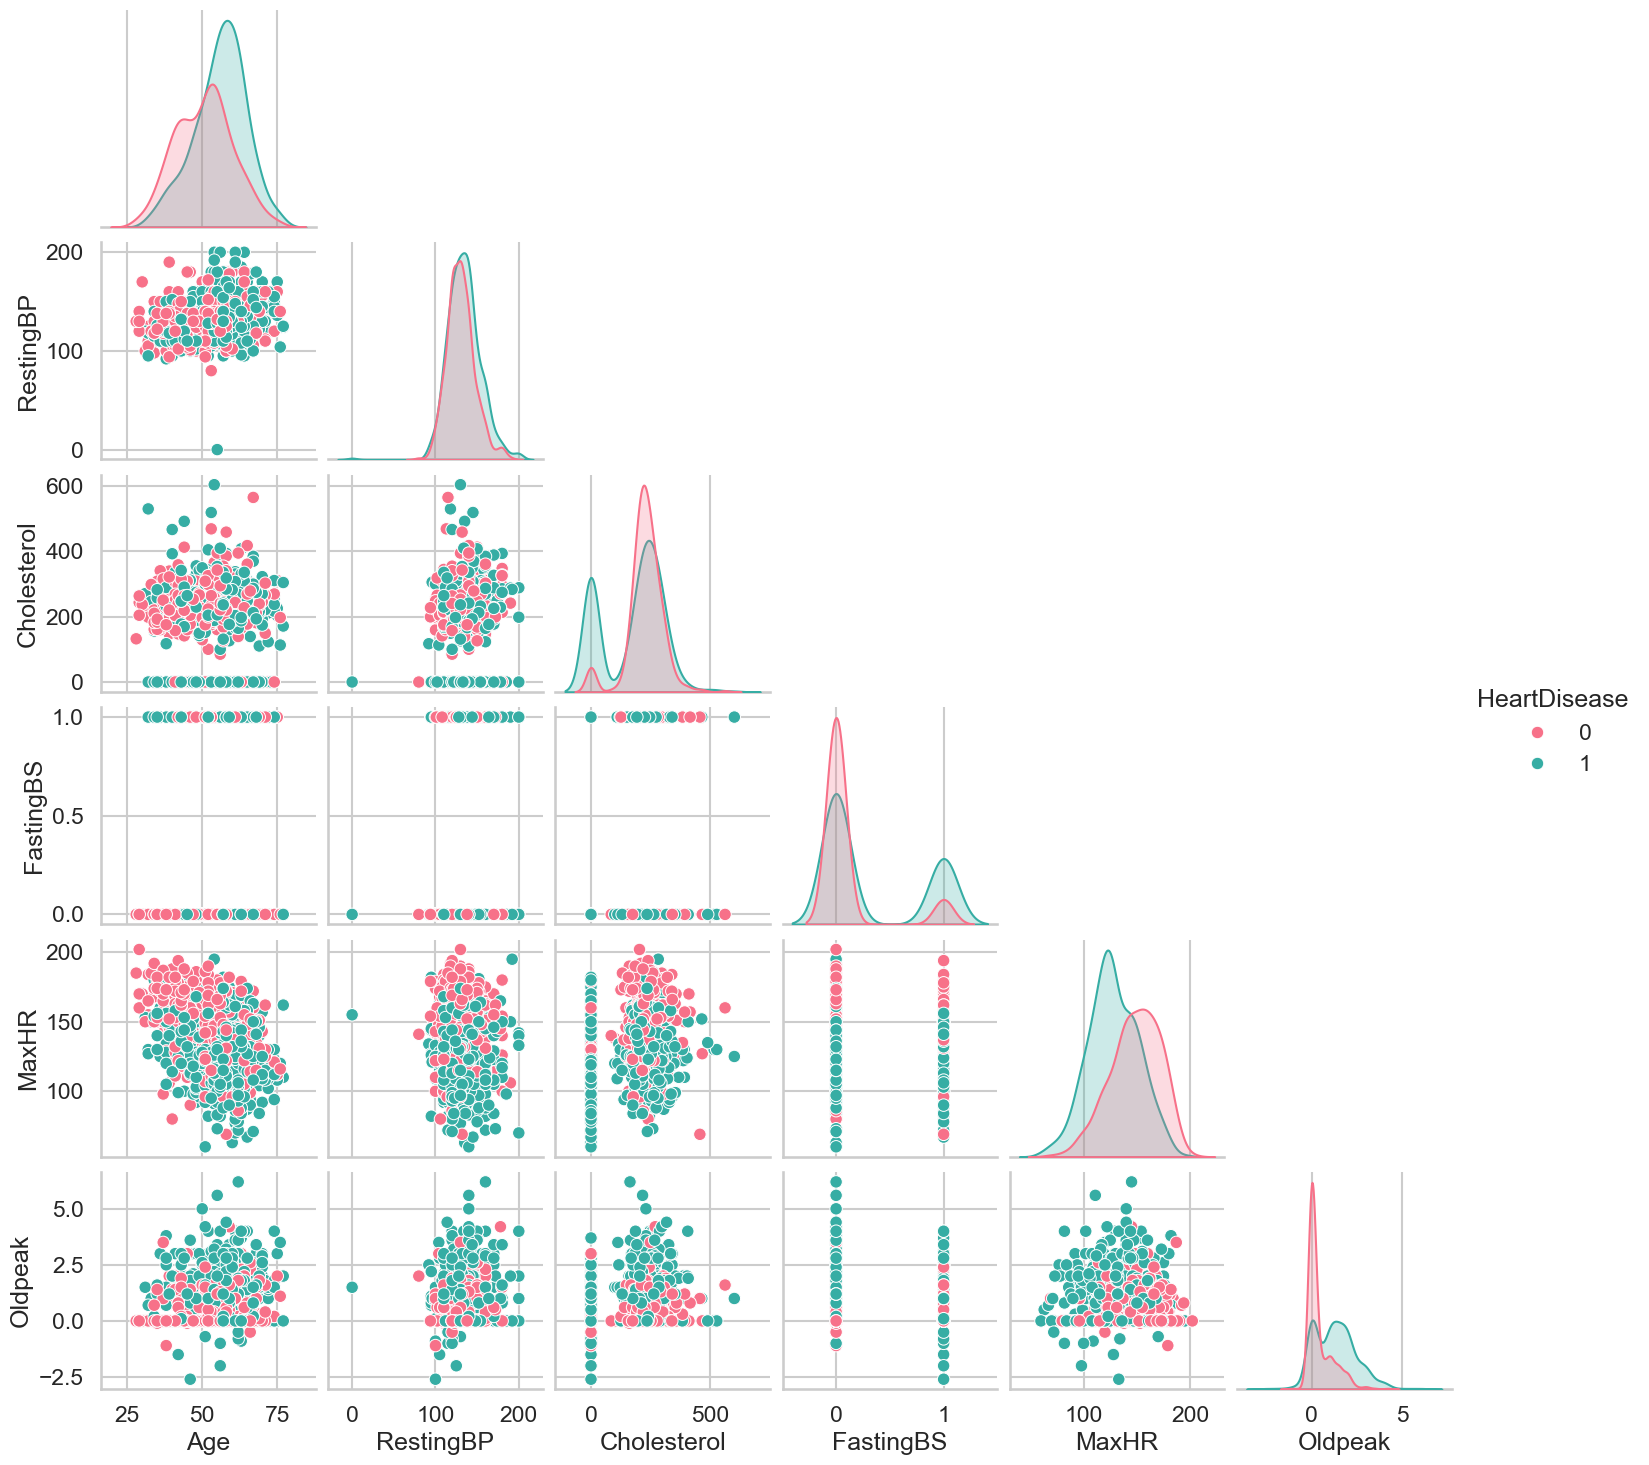

In [29]:
sns.pairplot(heart_df, hue="HeartDisease", palette="husl", corner=True);

## Bivariate distribution with HeartDisease

### Age vs RestingBP

In [30]:
px.density_heatmap(
    data_frame = heart_df,
    x="Age",
    y="RestingBP",
    color_continuous_scale="PuBu",
    facet_col="HeartDisease",
    title="Age vs. Chelesterol for different Heart Disease values",
)

/Users/nahom/anaconda3/lib/python3.11/site-packages/plotly/express/_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



### Age vs Cholesterol

In [31]:
px.density_heatmap(
    data_frame=heart_df,
    x="Age",
    y="Cholesterol",
    color_continuous_scale="PuBu",
    facet_col="HeartDisease",
    title="Age vs. Chelesterol for different Heart Disease values",
)

/Users/nahom/anaconda3/lib/python3.11/site-packages/plotly/express/_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



### Age vs MaxHR

In [32]:
px.density_heatmap(
    data_frame = heart_df,
    x="Age",
    y="MaxHR",
    color_continuous_scale="PuBu",
    facet_col="HeartDisease",
    title="Age vs. Chelesterol for different Heart Disease values",
)

/Users/nahom/anaconda3/lib/python3.11/site-packages/plotly/express/_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [33]:
# Save the data 

datapath = '../HeartFailurePrediction/data'
save_file(heart_df, 'HeartFailurePredictionEDAData.csv', datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)Y
Writing file.  "../HeartFailurePrediction/data/HeartFailurePredictionEDAData.csv"
